# **Project: Disease Prediction of Apple Leaf using Image Classification**

## **VoltaML Internship Assessment - Deep Learning Engineer**

### **Done By : Naveen Kumar S**

### **Reg.No : 21MDT0129**

### **Course : M.Sc Data Science**

    ______________________________________________________________________________________________________

### Problem Statement:

Disease has always been one of the main reasons for the decline of apple quality and yield, which directly harms the development of agricultural economy. Therefore, precise diagnosis of apple diseases and correct decision making are important measures to reduce agricultural losses and promote economic growth.

### Objective:

The Main objective of this project is to train a model using images of training datasets **1)** Accurately classify a given image from testing dataset into different diseased category or a healthy leaf; **2)** Accurately distinguish between many diseases, sometimes more than one on a single leaf; and guiding computer vision to search for relevant features during learning.

### Dataset Information:

- image_id: the foreign key

- combinations: one of the target labels

- healthy: one of the target labels

- rust: one of the target labels

- scab: one of the target labels

## Loading Dataset (Plant Pathology 2020 - FGVC7) and Importing the Required Libraries:

In [2]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [3]:
dir_path = r'D:\Python Projects\Apple Tree Diseases Prediction\Dataset\plant-pathology-2020-fgvc7\images'

In [4]:
print('Loading Training Data Labels from CSV file')
train = pd.read_csv('train.csv')
train.head(10)

Loading Training Data Labels from CSV file


,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
5,Train_5,1,0,0,0
6,Train_6,0,1,0,0
7,Train_7,0,0,0,1
8,Train_8,0,0,0,1
9,Train_9,1,0,0,0


### train.csv Labels Information:

- image_id: the foreign key

- combinations: one of the target labels

- healthy: one of the target labels

- rust: one of the target labels

- scab: one of the target labels

In [5]:
print('Loading Test Data Labels from CSV file')
test = pd.read_csv('test.csv')
test.head(5)

Loading Test Data Labels from CSV file


,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


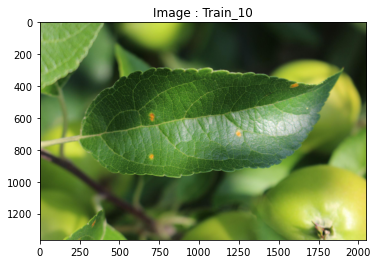

In [6]:
# Opening single Image 
image_open = Image.open(r'D:\Python Projects\Apple Tree Diseases Prediction\Dataset\plant-pathology-2020-fgvc7\images\Train_10.jpg')
plt.imshow(image_open)
plt.title('Image : Train_10')
plt.show()

## Data Prepartion:

### **Spliting the whole datset into training and testing dataset:**

In [7]:
class_labels = train.columns[1:]
print(class_labels)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [8]:
# Creating new Label column into train.csv
num = 0
train['label'] =0
for i in class_labels:
    train['label'] = train['label'] + train[i]*num
    num +=1
train.head(7)

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0
5,Train_5,1,0,0,0,0
6,Train_6,0,1,0,0,1


In [9]:
# Creating a Function
import re
def get_label(img):
    if re.search('Train',img):
        img = img.split('.')[0] # Fecth image_id from image name
        # return label corresponding to image_id
        label = train.loc[train['image_id'] == img]["label"]
        return label
    elif re.search('Test',img):
        pass

In [16]:
path__dir = r'D:\Python Projects\Apple Tree Diseases Prediction\Dataset\plant-pathology-2020-fgvc7'

In [17]:
# Creating New folders to separate data
shutil.os.mkdir(path__dir+ r'\train')
shutil.os.mkdir(path__dir+ r'\train\healthy')
shutil.os.mkdir(path__dir+ r'\train\multiple_diseases')
shutil.os.mkdir(path__dir+ r'\train\rust')
shutil.os.mkdir(path__dir+ r'\train\scab')
shutil.os.mkdir(path__dir+ r'\test')

In [18]:
img ='Train_10.jpg'
img.split("_")[1].split(".")[0]

'10'

In [19]:
# Creating fuction to copy images from original directory to respective folders based on labels
def copy_image_to_its_folder():
    images = natsort.natsorted(os.listdir(dir_path))  # Sorting image in proper form
    for img in tqdm(images):
        label = get_label(img) # Getting label of image
        path = os.path.join(dir_path,img) # Original path of image
        
        if search('Train',img): # Searching pattern 'Train' in Image name 
            # Label = get_label(img)
            if (img.split("_")[1].split(".")[0]) and label.item() == 0:
                shutil.copy(path,path__dir+ r'\train\healthy' )
            elif (img.split("_")[1].split(".")[0]) and label.item() == 1:
                shutil.copy(path,path__dir+ r'\train\multiple_diseases' )
            elif (img.split("_")[1].split(".")[0]) and label.item() == 2:
                shutil.copy(path,path__dir+ r'\train\rust' )
            elif (img.split("_")[1].split(".")[0]) and label.item() == 3:
                shutil.copy(path,path__dir+ r'\train\scab' )
        elif search('Test',img):
            shutil.copy(path,path__dir+ r'\test')

In [20]:
data_dir = copy_image_to_its_folder()

100%|██████████████████████████████████████████████████████████████████████████████| 3642/3642 [00:54<00:00, 67.37it/s]


## Image Preprocessing:

**1. Resizing Image**

**2. Rescaling Image**

**3. Image Augmentation**

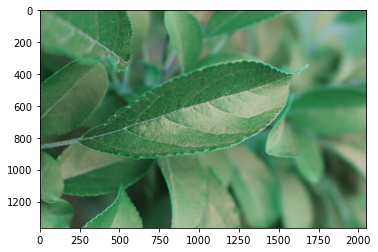

In [21]:
Train_dir = path__dir+ r'\train'
Categories = ['healthy','multiple_diseases','rust','scab']
for i in Categories:
    path = os.path.join(Train_dir,i)
    for img in os.listdir(path):
        old_image = cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        new_image=cv2.resize(old_image,(256,256))
        plt.imshow(old_image)
        plt.show()
        break
    break

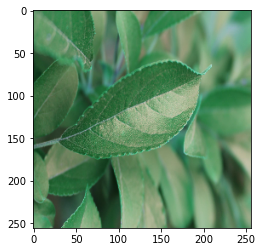

In [22]:
new_image=cv2.resize(old_image,(256,256))
plt.imshow(new_image)
plt.show()

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
datagen = ImageDataGenerator(rescale = 1/255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            vertical_flip = True,
                            validation_split = 0.2)

train_datagen = datagen.flow_from_directory(Train_dir,
                                target_size = (256,256),
                                batch_size =16,
                                class_mode = 'categorical',
                                subset = 'training')
val_datagen = datagen.flow_from_directory(Train_dir,
                                         target_size = (256,256),
                                    batch_size =16,
                                    class_mode = 'categorical',
                                    subset = 'validation')

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


## CNN Model Building:

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense,Activation,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,BatchNormalization

In [26]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

## Optimizer: Adam CNN Model

In [27]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [28]:
checkpoint=ModelCheckpoint(r'apple_tree_diseases.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0.001,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [29]:
model_history = model.fit(train_datagen, validation_data=val_datagen,
                          epochs = 5,
                          callbacks =callbacks)

Epoch 1/5
92/92 [==============================] - ETA: 0s - loss: 1.2626 - accuracy: 0.3217
Epoch 1: val_loss improved from inf to 1.25481, saving model to apple_tree_diseases.h5
92/92 [==============================] - 289s 3s/step - loss: 1.2626 - accuracy: 0.3217 - val_loss: 1.2548 - val_accuracy: 0.3306
Epoch 2/5
92/92 [==============================] - ETA: 0s - loss: 1.2648 - accuracy: 0.3354
Epoch 2: val_loss did not improve from 1.25481
92/92 [==============================] - 293s 3s/step - loss: 1.2648 - accuracy: 0.3354 - val_loss: 1.2569 - val_accuracy: 0.3416
Epoch 3/5
92/92 [==============================] - ETA: 0s - loss: 1.1668 - accuracy: 0.4088
Epoch 3: val_loss improved from 1.25481 to 1.00292, saving model to apple_tree_diseases.h5
92/92 [==============================] - 278s 3s/step - loss: 1.1668 - accuracy: 0.4088 - val_loss: 1.0029 - val_accuracy: 0.5372
Epoch 4/5
92/92 [==============================] - ETA: 0s - loss: 0.8862 - accuracy: 0.5665
Epoch 4: val_

### Accuracy = 69.4

### ***I have done only 5 Epochs due to my system capacity (i.e: I have used CPU only because I didn't have GPU). In CPU, The training process runs slowly that depends upon the dataset, that I have taken for this project.***

## Plotting the Graph for Training vs Validation Accuracy:

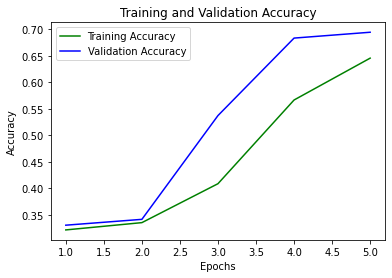

In [42]:
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epoachs = range(1,6)
plt.plot(epoachs,train_acc,'g',label='Training Accuracy')
plt.plot(epoachs,val_acc,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

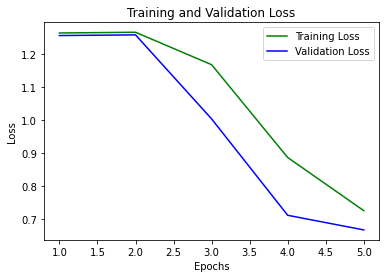

In [44]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,6)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [31]:
# To Save the model
model.save('Apple_Tree_Disease.h5')

## Prediction on a Test Image:

1/1 [==============================] - 0s 64ms/step
2


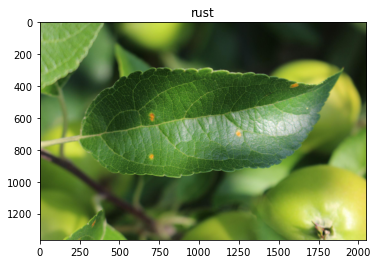

In [45]:
test_image=r'D:\Python Projects\Apple Tree Diseases Prediction\Dataset\plant-pathology-2020-fgvc7\images\Train_10.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(256,256))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))

Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

### From the above leaf image, I have predicted that the given leaf as ***Rust disease***. 

## Conclusion:

In this project, I have classified the Apple Leaf's disease that is in the categories of healthy leaf, multiple disease, rust or scab by using image classification with the help of **Computer Vision**. Here by I have imported all the libraries, which is necessary for integrating the model that is created to predict the disease of the Apple Leaf by using Convolutional Neural Network (CNN) with Adam Optimizer using ***Plant Pathology 2020 - FGVC7*** dataset and results with better validation accuracy **69.4**.